In [5]:
import pandas as pd
import os

In [72]:
#p = os.path.join("../data","twitter.csv")
df = pd.read_csv(CONST.TWITTER_DATA)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [73]:
df.shape

(24783, 7)

In [74]:
df.drop_duplicates(inplace=True)
df.shape
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

Changing both hate and offensive to hate 


In [75]:
df['class'] = df['class'].apply(lambda x : 1 if (x==0 or x==1) else 0 )

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

The data is not uniform.It contains more hate speech examples.

<BarContainer object of 2 artists>

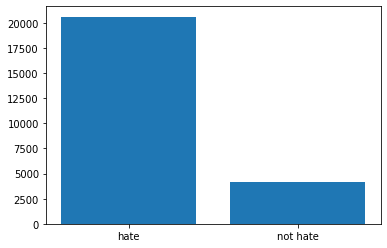

In [77]:
class_frequency = list(df['class'].value_counts())
plt.bar(['hate','not hate'],class_frequency)



In [81]:
#p2 = os.path.join("../data","twitter2.csv")
df2 = pd.read_csv(CONST.TWITTER_DATA_2);
df2.head()
#df2.shape

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [82]:
df2.drop_duplicates(inplace=True)
df2.shape

(31962, 3)

This dataset has less hate comments.

<BarContainer object of 2 artists>

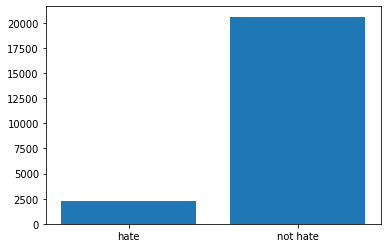

In [83]:
class_frequency2 = list(df2['label'].value_counts())
plt.bar(['hate','not hate'],[class_frequency2[1],class_frequency[0]])


# Merging the two dataframes

In [84]:
df2.rename(columns={'label':'class'},inplace=True)
df_final = pd.concat([df[['tweet','class']],df2[['tweet','class']]])

In [85]:
df_final.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [86]:
df_final.shape

(56745, 2)

In [87]:
df_final.drop_duplicates(inplace=True)
df_final.shape

(54313, 2)

In [88]:
df_final.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            31950, 31952, 31953, 31954, 31955, 31956, 31957, 31958, 31959,
            31961],
           dtype='int64', length=54313)

In [19]:
df_final.reset_index(drop=True,inplace=True)
df_final.index

RangeIndex(start=0, stop=54313, step=1)

In [89]:
class_frequency_final = df_final['class'].value_counts()

<BarContainer object of 2 artists>

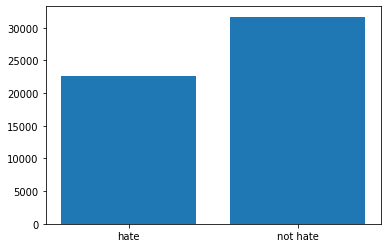

In [90]:
plt.bar(["hate","not hate"],[class_frequency_final[1],class_frequency_final[0]])

In [109]:
from pathlib import Path

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_final['tweet'], df_final['class'], test_size=0.22, random_state=42)

<BarContainer object of 2 artists>

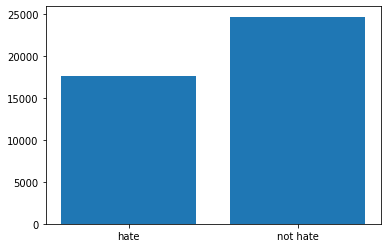

In [92]:
train_frequency = Y_train.value_counts()
plt.bar(["hate","not hate"],[train_frequency[1] ,train_frequency[0]])

In [94]:
train_dataframe = pd.concat([X_train,Y_train],axis=1)
#train_dataframe.to_csv(Path('../data/train_data'))


<BarContainer object of 2 artists>

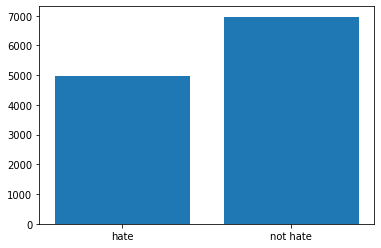

In [95]:
test_frequency = Y_test.value_counts()
plt.bar(["hate","not hate"],[test_frequency[1] ,test_frequency[0]])

In [76]:
Y_test.value_counts()

0    6968
1    4981
Name: class, dtype: int64

In [43]:
test_dataframe = pd.concat([X_test,Y_test],axis=1)
test_dataframe.to_csv(Path('../data/test_data'))

In [78]:
%run ../paths.py
CONST = CONST()

<Figure size 432x288 with 0 Axes>

In [79]:
CONST.RAW_DATA
CONST.TWITTER_DATA

PosixPath('../dataset/twitter.csv')

In [100]:
#pd.read_csv(CONST.RAW_DATA).shape
pd.read_csv(CONST.TEST_DATA).shape

(11949, 3)

Trying out pickle

In [153]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
targets = iris_dataset.target_names

X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"])
kn = KNeighborsClassifier(1)
kn.fit(X_train, y_train)
print(type(X_test[0]))
print(X_test[0])
      #for i in range(len(X_test)):
    #x_new = np.array([X_test[i]])
    #prediction = kn.predict(x_new)
    #print("Actual:[{0}] [{1}],Predicted:{2} {3}".format(y_test[i], targets[y_test[i]], prediction, targets[prediction]))

#print("\nAccuracy: ", kn.score(X_test, y_test))

<class 'numpy.ndarray'>
[6.3 3.4 5.6 2.4]


In [163]:
import pickle
Pkl_Filename = Path("../model/Pickle_KNN_Model.pkl")

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(kn, file)

In [164]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_KNN_Model = pickle.load(file)
Pickled_KNN_Model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [165]:
Pickled_KNN_Model.score(X_test, y_test)

0.9736842105263158

In [166]:
Pickled_KNN_Model.predict(np.array([X_test[12]]))

array([2])

In [167]:
type(np.asarray([6.3, 3.4, 5.6, 2.4]))
Pickled_KNN_Model.predict(np.array([np.asarray([6.3, 3.4, 5.6, 2.4])]))

array([2])

In [168]:
str(Pickled_KNN_Model.predict(np.array([np.asarray([6.3, 3.4, 5.6, 2.4])])))

'[2]'

In [170]:
!which python

/home/sandhya/Project/final/bin/python
